# Sentiment Analysis using Deep Learning
________________________________________________________________________________________
## Outline
* #### Introduction
    * Sentiment Analysis <br><br>

* #### Case Study
    * Keras IMDB Dataset<br><br>
    * Data Analysis<br><br>
    * Word Embeddings<br><br>
    * Convolutional Neural Network<br><br>
    * Summary
    ____

# Introduction
## Sentiment Analysis
________________________________________________________________________________________

* Computational study of opinions, sentiments and emotions in text
* Task: Classifying the expressed opinion of a text (positive, negative, neutral)
* Sentiment analysis uses:  
    * natural language processing (NLP)
    * text analysis 
    * computational techniques 
* to automate the extraction or classification of sentiment from text


### Types of sentiment
* structured 
* semi-structured
* unstructured

### Different levels of Sentiment Analysis:
* Document based: One score for the whole document (e.g. review)
* Sentence based: Does sentence express positive, neutral, negative opinion
* Aspect based: Focus on a specific aspect and identify what people like/dislike

### Why do we need sentiment analysis? 

* it becomes a hot area in decisionmaking
* 97% of customer’s read online reviews for local business in 2017 (Local Consumer Review Survey 2017)
* 85% of consumers trust online reviews as much as personal recommendations (Local Consumer Review Survey 2017)

______________________________________________________________________________________

### Preprocessing

<img src="images/Preprocessing.png" alt="IMDB" style="width: 900px;"/>
______________________________________________________________________________________


### Example

In [2]:
# import the 
import nltk
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.tokenize import RegexpTokenizer

/Users/ninosyonan/anaconda3/lib/python3.6/site-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


#### 1. Step Tokenization: Split each token/word for itself

In [3]:
# Tokenization
data = "Titanic is a great movie but the worst movie made by one of the greatest directors, called James Cameron!"
tokenizer = RegexpTokenizer(r'\w+')
word_tokens = tokenizer.tokenize(data)
print(word_tokens)

['Titanic', 'is', 'a', 'great', 'movie', 'but', 'the', 'worst', 'movie', 'made', 'by', 'one', 'of', 'the', 'greatest', 'directors', 'called', 'James', 'Cameron']


____
#### 2. Step Stop word removal: remove stop words such as: by, my, and, a…

In [4]:
# Stopword removal
stop_words = set(stopwords.words('english')) 
filtered_sentence = [w for w in word_tokens if not w in stop_words]
 
filtered_sentence = []
 
for w in word_tokens:
    if w not in stop_words:
        filtered_sentence.append(w)
        
print(filtered_sentence)

['Titanic', 'great', 'movie', 'worst', 'movie', 'made', 'one', 'greatest', 'directors', 'called', 'James', 'Cameron']


____
#### 3. Step Stemming: reduce each token/word into the original word stem/root form

In [5]:
# Stemming
ps = PorterStemmer()
 
for word in filtered_sentence:
  print(ps.stem(word))

titan
great
movi
worst
movi
made
one
greatest
director
call
jame
cameron


____
#### 4. Step Sentiment assignment: assign positive, negative and neutral words and the overall sentiment

In [6]:
#Sentiment Assingment
  
sid = SentimentIntensityAnalyzer()
for sentence in filtered_sentence:
     print(sentence)
     ss = sid.polarity_scores(sentence)
     for k in ss:
         print('{0}: {1}, ' .format(k, ss[k]), end='')
     print()

Titanic
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
great
neg: 0.0, neu: 0.0, pos: 1.0, compound: 0.6249, 
movie
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
worst
neg: 1.0, neu: 0.0, pos: 0.0, compound: -0.6249, 
movie
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
made
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
one
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
greatest
neg: 0.0, neu: 0.0, pos: 1.0, compound: 0.6369, 
directors
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
called
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
James
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 
Cameron
neg: 0.0, neu: 1.0, pos: 0.0, compound: 0.0, 


____
### Challenges of Sentiment Analysis

* abbreviations (e.g. LOL, YOLO, CD9 → Code 9, parents around)
* emoticons
* sarcasm 
* negation

<img src="images/Smiley.png" alt="IMDB" style="width: 100px;"/>

____
# Case Study: 
## Keras IMDB Movie Review Dataset


___
<img src="images/Reviews.png" alt="IMDB" style="width: 500px;"/>

___
<img src="images/Apple.png" alt="IMDB" style="width: 600px;"/>

___
### Tutorial
* The overall goal and focus is to evaluate whether sentiment expressed in movie reviews obtained from IMDB can effectively indicate public opinion
* The underlying data mining question becomes whether we can devise a model that can measure the polarity of the text accurately <br><br>
____

### Keras IMDB Dataset:
* The dataset has originally been used in Maas et al. (2011): Learning Word Vectors for Sentiment Analysis<br><br>
* 50.000 movie reviews, labeled (pos/neg)<br><br>
* Overall distribution of labels is balanced
    * 25.000 for training and 25.000 for testing <br><br>
* The words have been replaced by integers that indicate the absolute popularity of the word 
    * The sentences in each review are therefore comprised of a sequence of integers.
    * e.g.: integer "3" encodes the 3rd most frequent word in the data
____

In [7]:
from helperfunctions import *

/Users/ninosyonan/anaconda3/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)
Using TensorFlow backend.


Total running time:  4.6000000001100716e-05


#### Now we will have a deeper look into the Keras IMDB dataset and its characteristics:
* Movie reviews are not expected to have the same text length (number of words) 
* Neural networks are expecting a fixed size of input vector
* We will therefore have to either truncate long reviews or pad short reviews
____

In [13]:
# start by loading the entire IMDB dataset
print('Loading the IMDB dataset...')
(x_train, y_train), (x_test, y_test) = imdb.load_data()
print(len(x_train), 'train sequences')
print(len(x_test), 'test sequences')
print()

# print a review from the Keras IMDB dataset
print("Keras IMDB Review-Example:")
print(x_train[0])
print()

# print a review from the original dataset
print("Review-Example from the original dataset:")
csvfile = open('/Users/ninosyonan/Documents/Uni/Master/3. Semester/Information Systems Seminar/Python/train.csv','r')
csvFileArray = []
for row in csv.reader(csvfile, delimiter = '.'):
    csvFileArray.append(row)
print(csvFileArray[1])

Loading the IMDB dataset...
25000 train sequences
25000 test sequences

Keras IMDB Review-Example:
[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 22665, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 21631, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 19193, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 10311, 8, 4, 107, 117, 5952, 15, 256, 4, 31050, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 12118, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 

UnicodeDecodeError: 'ascii' codec can't decode byte 0xc2 in position 7123: ordinal not in range(128)

#### Results:
* First Example: list of integers - each integer represents one word in a movie review
    * the words have been replaced by integers<br><br>
* Second Example: the text of an example review from our the original dataset
    * we can see that it is a regular text written review  
____

### The top 10 most frequently used words across the dataset:
* The most frequent words are typical stopwords ("the", "and", "a"...)

In [12]:
# show the first 10 words to know what the most frequent words of the dataset are
# index/word mapping
idx = imdb.get_word_index()
idx2word = {v: k for k, v in idx.items()}

idx_arr = sorted(idx, key=idx.get)
idx_arr[:10] # first 10 words

['the', 'and', 'a', 'of', 'to', 'is', 'br', 'in', 'it', 'i']

____
### Wordcloud

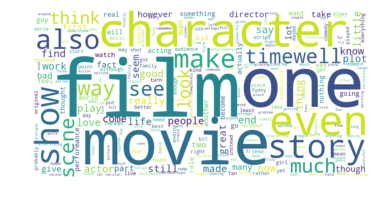

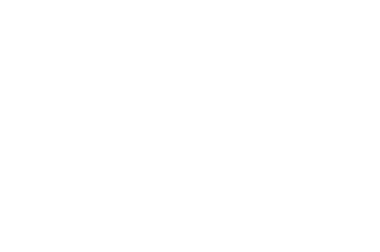

In [14]:
# Get the text and join all reviews in training set
text = ' '.join(train_data[0]) 

# limit the word count
wordcount = 500

# stop words
stopwords = set(STOPWORDS)
stopwords.add("br")

# setup and generate the word cloud
wc = WordCloud(scale=4, 
               background_color="white", 
               max_words=wordcount, 
               stopwords=stopwords)
wc.generate(text)

# store to file
wc.to_file("wordcloud.png")

# show the wordcloud
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.axis("off")
plt.show()

____
### Number of classes
* It is a binary classification problem for positive and negative sentiment in the review

In [15]:
# summarize the number of classes by printing the unique class values.
    
print("Classes: ")
print(np.unique(y_train))

Classes: 
[0 1]


____
### Summary  Statistics:

In [16]:
# print  number of unique words
print("Number of words: ")
print(len(np.unique(np.hstack(x_train))))
print ()

# print the average review length
print("Average review length:")
result = [len(x) for x in x_train]
print("Mean %.2f words (%f)" % (np.mean(result), np.std(result)))

Number of words: 
88585

Average review length:
Mean 238.71 words (176.493674)


#### Results:
* Number of unique words in the dataset: 88585 words
* Average review word legnth: 238.71 words
* Standard deviation: 176.49

____
### Boxplot

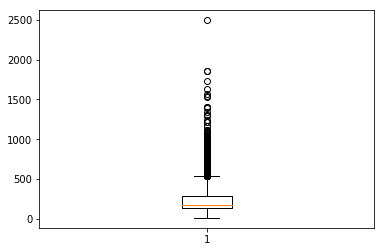

In [17]:
# with matplotlib we can plot a boxplot to show the review length in words

plt.boxplot(result)
plt.show()

#### Results:
* Looking a boxplot for the review lengths in words, we can can see that we can cover the mass of the distribution with a length of 400 to 500 words
* The overall distribution review length is positively skewed, indicating that most reviews are under 500 words

___
### Which words make a review positive or negative?

In [18]:
# function to access the combined text files of all reviews
import io
import pandas as pd
import numpy as np

with io.open('aclImdb/train-pos.txt', encoding='utf-8') as f:
    train_pos = pd.DataFrame({'review': list(f)})    
with io.open('aclImdb/train-neg.txt', encoding='utf-8') as f:
    train_neg = pd.DataFrame({'review': list(f)}) 
train_reviews = pd.concat([train_neg, train_pos], ignore_index=True)

with io.open('aclImdb/test-pos.txt', encoding='utf-8') as f:
    test_pos = pd.DataFrame({'review': list(f)})
with io.open('aclImdb/test-neg.txt', encoding='utf-8') as f:
    test_neg = pd.DataFrame({'review': list(f)})    
test_reviews = pd.concat([test_neg, test_pos], ignore_index=True)
  
X_train = train_reviews['review']
X_test = test_reviews['review']

y_train = np.append(np.zeros(12500), np.ones(12500))
y_test = np.append(np.zeros(12500), np.ones(12500))

___
#### Which words make a review positive?

In [19]:
vocabulary = vectorizer.get_feature_names()
coefs = logistic_model.coef_
word_importances = pd.DataFrame({'word': vocabulary, 'coef': coefs.tolist()[0]})
word_importances_sorted = word_importances.sort_values(by='coef', ascending = False)
word_importances_sorted[:10]

,coef,word
2969,0.672635,excellent
6681,0.563958,perfect
9816,0.521026,wonderful
8646,0.520818,superb
3165,0.505146,favorite
431,0.502118,amazing
5923,0.481505,must see
5214,0.461807,loved
3632,0.458645,funniest
2798,0.453481,enjoyable


___
#### Which words make a review negative?

In [20]:
word_importances_sorted[-11:-1]

,coef,word
6864,-0.564446,poor
2625,-0.565503,dull
9855,-0.575061,worse
4267,-0.588133,horrible
2439,-0.596303,disappointing
6866,-0.675187,poorly
1045,-0.681608,boring
2440,-0.688024,disappointment
702,-0.811185,awful
9607,-0.838195,waste


___
#### Which 2-grams make it positive?

In [21]:
word_importances_bigrams = word_importances_sorted[word_importances_sorted.word.apply(lambda c: len(c.split()) >= 2)]
word_importances_bigrams[:10]

,coef,word
5923,0.481505,must see
3,0.450675,10 10
6350,0.421314,one best
9701,0.389081,well worth
5452,0.371277,may not
6139,0.329485,not bad
6970,0.323805,pretty good
2259,0.307238,definitely worth
5208,0.303380,love movie
9432,0.301404,very good


___
#### Which 2-grams make it negative?

In [22]:
word_importances_bigrams[-11:-1]

,coef,word
6431,-0.247169,only good
3151,-0.250090,fast forward
9861,-0.264564,worst movie
6201,-0.324169,not recommend
6153,-0.332796,not even
6164,-0.333147,not funny
6217,-0.357056,not very
6169,-0.368976,not good
6421,-0.437750,one worst
9609,-0.451138,waste time
